# Localised Regression charts

## Set-up

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# local import
import plotting
from common import ATTITUDINAL, VOTING_INTENTION, ensure
from data_capture import retrieve

In [3]:
SHOW = True

## Get data

In [4]:
data = retrieve()
ensure(data, "You must run the data capture notebook every day.")

In [5]:
# Double check that our voting intention data has been normalized ...
# Ideally, this cell will show nothing is wrong.

checkable = "Primary", "2pp"
vi = data[VOTING_INTENTION]
for check in checkable:
    columns = [c for c in vi.columns if check in c and "Other" not in c]
    check_these = vi[columns]
    row_sum = check_these.sum(axis=1)
    fail = check_these[(row_sum > 100.01) | (row_sum < 99.99)].copy()
    if len(fail):
        fail["TOTAL"] = row_sum
        display(fail)

In [6]:
# Amalgamate the ONP, UAP and OTH columns
vi = plotting.amalgamate_other(data[VOTING_INTENTION])

# let's look at the Primary Vote column names ...
[x for x in vi.columns if "Primary vote" in x]

['Primary vote L/NP',
 'Primary vote ALP',
 'Primary vote GRN',
 'Primary vote ONP',
 'Primary vote UAP',
 'Primary vote OTH',
 'Primary vote Other']

## And plot

In [7]:
# Note: sometimes a change in case buggers up the 
# plotable selection dictionary in the next code block.
# So let's make sure we have the correct names for each 
# column

print(data[ATTITUDINAL].columns)

Index(['Date', 'Brand', 'Interview mode', 'Sample size',
       'Preferred prime minister Albanese', 'Preferred prime minister Dutton',
       'Preferred prime minister Don't Know', 'Preferred prime minister Net',
       'Albanese Satisfied', 'Albanese Dissatisfied', 'Albanese Don't Know',
       'Albanese Net', 'Dutton Satisfied', 'Dutton Dissatisfied',
       'Dutton Don't Know', 'Dutton Net', 'First Date', 'Mean Date',
       'Last Date'],
      dtype='object')


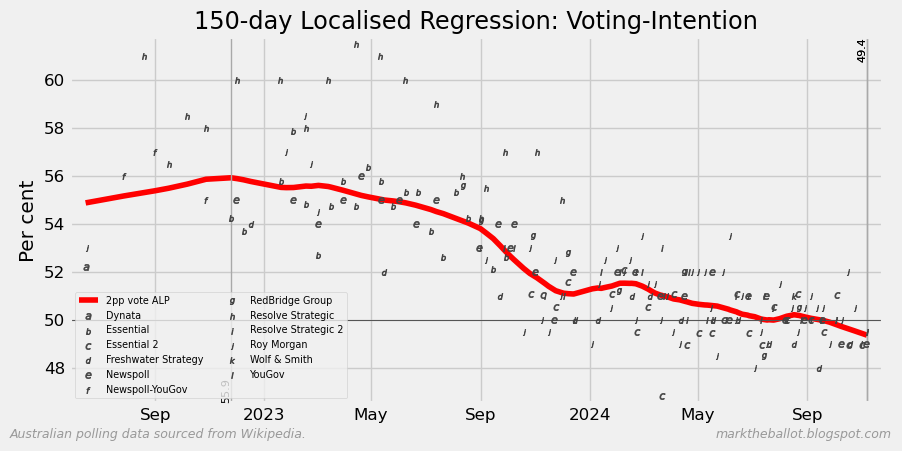

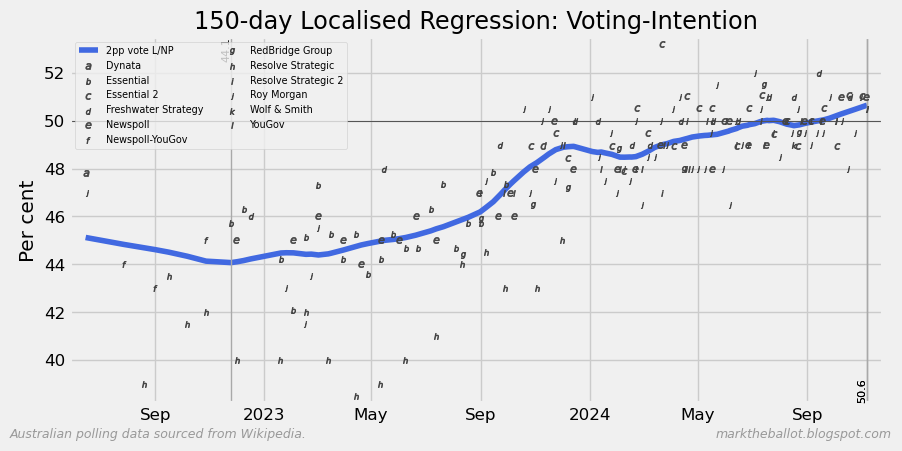

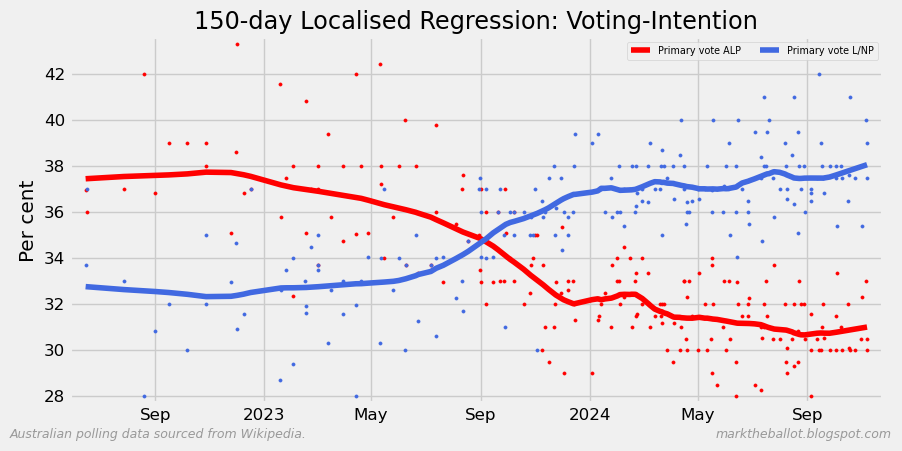

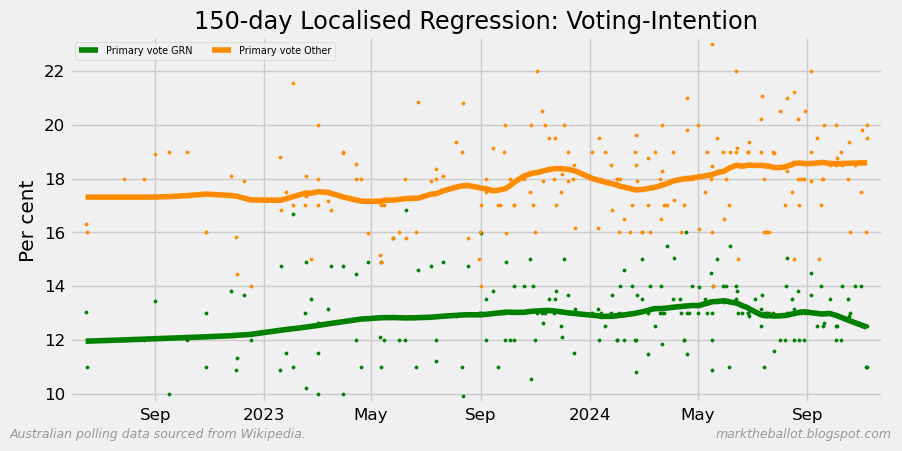

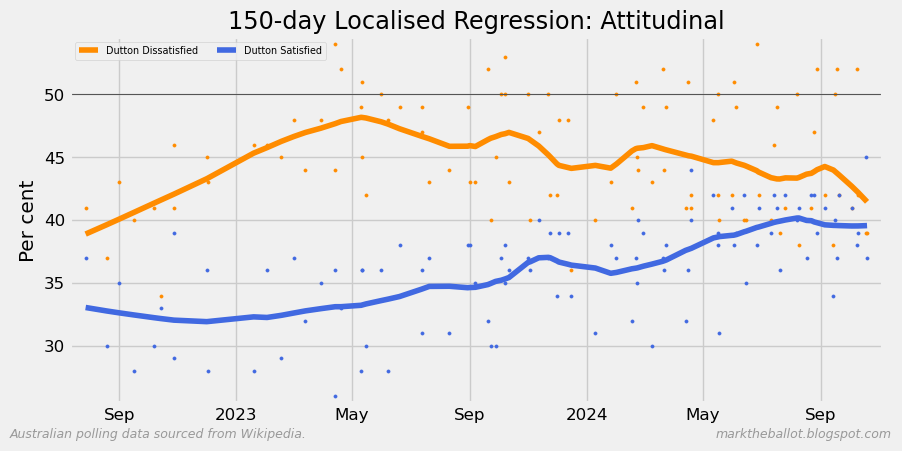

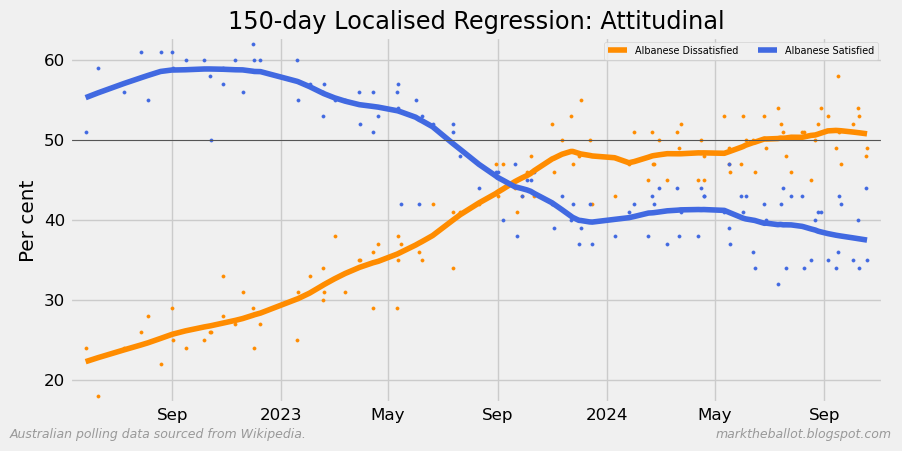

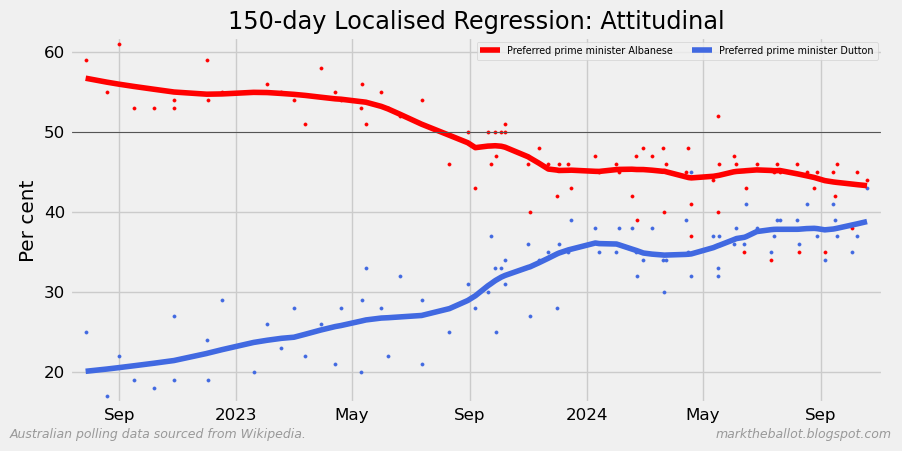

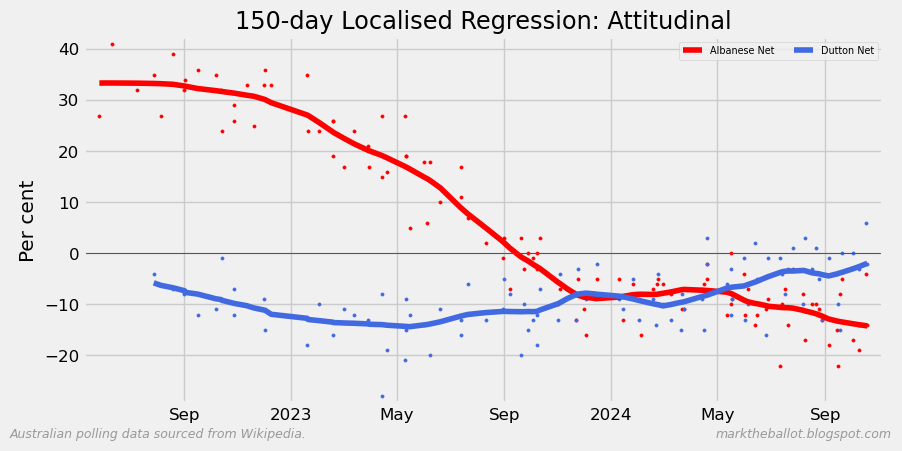

In [8]:
# what we will plot ...
plotable = {
    VOTING_INTENTION: [
        # regex patterns for matching desired columns
        r"2pp vote ALP",
        r"2pp vote L/NP",
        r"Primary vote (L/NP|ALP)",
        r"Primary vote (GRN|Other)",
    ],
    ATTITUDINAL: [
        # regex patterns for matching desired columns
        r"^Dutton (Satisfied|Dissatisfied)",
        r"^Albanese (Satisfied|Dissatisfied)",
        r"Preferred prime minister (Dutton|Albanese)",
        r"(Dutton|Albanese) Net",
    ],
}

plotting.plot_loess(data, plotable, show=SHOW)

## Finished

In [9]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Wed Nov 13 2024 12:02:47

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.29.0

pandas    : 2.2.3
matplotlib: 3.9.2

Watermark: 2.5.0



In [10]:
print("Finished")

Finished
